<a href="https://colab.research.google.com/github/nicolazilio0/deepRiccy/blob/main/Baseline%2BStanza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! tar -zxf /content/drive/MyDrive/Uni/DeepRiccy/refcocog.tar.gz
! pip3 install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
!pip install rouge-metric

local_path = '/content/refcocog/images/'
local_annotations = '/content/refcocog/annotations/'

Streaming output truncated to the last 5000 lines.
./refcocog/images/COCO_train2014_000000272463.jpg
./refcocog/images/COCO_train2014_000000485426.jpg
./refcocog/images/COCO_train2014_000000002774.jpg
./refcocog/images/COCO_train2014_000000346160.jpg
./refcocog/images/COCO_train2014_000000199829.jpg
./refcocog/images/COCO_train2014_000000210057.jpg
./refcocog/images/COCO_train2014_000000544117.jpg
./refcocog/images/COCO_train2014_000000440673.jpg
./refcocog/images/COCO_train2014_000000006151.jpg
./refcocog/images/COCO_train2014_000000514391.jpg
./refcocog/images/COCO_train2014_000000247459.jpg
./refcocog/images/COCO_train2014_000000141257.jpg
./refcocog/images/COCO_train2014_000000378896.jpg
./refcocog/images/COCO_train2014_000000514558.jpg
./refcocog/images/COCO_train2014_000000244416.jpg
./refcocog/images/COCO_train2014_000000558486.jpg
./refcocog/images/COCO_train2014_000000377467.jpg
./refcocog/images/COCO_train2014_000000114657.jpg
./refcocog/images/COCO_train2014_000000252905.jpg

### PC

In [ ]:
local_path = './refcocog/images/' 
local_annotations = './refcocog/annotations/' 

In [ ]:
! pip3 install stanza
! pip install ftfy regex tqdm

# Baseline

In [ ]:
#imports

import json
import pickle
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from pkg_resources import packaging
import clip
import numpy as np

import os
import skimage
import IPython.display

from collections import OrderedDict
import torch

import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

import stanza

stanza.download('en',model_dir='/models/english',package='partut')
nlp = stanza.Pipeline(lang='en')

In [ ]:
def remove_of(sentence):
 if "side of" in sentence:
    index=sentence.find("side of")
    sentence=sentence[index+7:]
    return sentence
 if "handle of" in sentence:
    index=sentence.find("handle of")
    sentence=sentence[index+9:]
 if "bunch of" in sentence:
    index=sentence.find("bunch of")
    sentence=sentence[index+8:]
    return sentence   
 if "corner of" in sentence:
    index=sentence.find("corner of")
    sentence=sentence[index+9:]
    return sentence
 if "end of" in sentence:
    index=sentence.find("end of")
    sentence=sentence[index+6:]
    return sentence
 if "half of" in sentence:
    index=sentence.find("half of")
    sentence=sentence[index+7:]
    return sentence    
 if "edge of" in sentence:
    index=sentence.find("edge of")
    sentence=sentence[index+7:]    
    return sentence
 if "back of" in sentence:
    index=sentence.find("back of")
    sentence=sentence[index+7:]
    return sentence   
 if "smaller of" in sentence:
    index=sentence.find("smaller of")
    sentence=sentence[index+10:]
    return sentence    
 if "piece of" in sentence:
    index=sentence.find("piece of")
    sentence=sentence[index+8:]
    return sentence 
 if "wing of" in sentence:
    index=sentence.find("wing of")
    sentence=sentence[index+7:]    

 if "front of" in sentence:
    index=sentence.find("front of")
    sentence=sentence[index+8:]   
    return sentence 
 if "back side of" in sentence:
    index=sentence.find("back side of")
    sentence=sentence[index+12:]   
    return sentence
 if "pile of" in sentence:
    index=sentence.find("pile of")
    sentence=sentence[index+7:]    
    return sentence
 if "pair of" in sentence:
    index=sentence.find("pair of")
    sentence=sentence[index+7:] 
    return sentence   
 if "pieces of" in sentence:
    index=sentence.find("pieces of")
    sentence=sentence[index+9:]   
    return sentence 
 if "intersection of" in sentence:
    index=sentence.find("intersection of")
    sentence=sentence[index+15:]  
    return sentence  
 if "middle of" in sentence:
    index=sentence.find("middle of")
    sentence=sentence[index+9:]
    return sentence    
 if "patch of" in sentence:
    index=sentence.find("patch of")
    sentence=sentence[index+8:]    
    return sentence
 if "couple of" in sentence:
    index=sentence.find("couple of")
    sentence=sentence[index+8:]    
    return sentence
 if "slice of" in sentence:
    index=sentence.find("slice of")
    sentence=sentence[index+8:]    
    return sentence
 if "tallest of" in sentence:
    index=sentence.find("tallest of")
    sentence=sentence[index+10:]    
    return sentence
 if "kind of" in sentence:
    index=sentence.find("kind of")
    sentence=sentence[index+7:]
    return sentence    
 if "that is" in sentence:
    index=sentence.find("that is")
    sentence=sentence[:index]
    return sentence
 if "part of" in sentence:
    index=sentence.find("part of")
    sentence=sentence[index+7:]
    return sentence
 if "corner of" in sentence:
    index=sentence.find("corner of")
    sentence=sentence[index+9:]
    return sentence
 if "half of" in sentence:
    index=sentence.find("half of")
    sentence=sentence[index+7:]
    return sentence
 if "top of" in sentence:
    index=sentence.find("top of")
    sentence=sentence[index+6:]
    return sentence
 return sentence



In [ ]:
def sent_stanza_processing(sentence):
  sentence=sentence.lower()
  if sentence.startswith('there is '):
    sentence = 'the ' + sentence[9:]
  if sentence.startswith('this is '):
    sentence = sentence[9:]
  sentence=remove_of(sentence)


  nlp_sent = sentence.lower()

  #put the sentence in lower case
  # if the sentence does not start with "a" or "the" insert it
  x = nlp_sent.split(" ")
  if(x[0]!="the" and x[0]!="a"):
    nlp_sent="the "+ nlp_sent


  doc = nlp(nlp_sent)
  # print nlp dependencies
  #doc.sentences[0].print_dependencies()
  #print(input["sentences"]["raw"])
  root=''
  phrase_upos=[]
  # get heads of words
  heads=[sent.words[word.head-1].text for sent in doc.sentences for word in sent.words]
  for sent in doc.sentences:
    for word in sent.words:
     #if it is a verbal phrase then take the nominal subject of the phrase
     if(word.deprel=='nsubj' or word.deprel=='nsubj:pass'):
       root=word.text
       return word.text 
       #print(word.text)
       break
     #print(word)  
     phrase_upos.append(word)
     # else take the root of the phrase
     if(word.head==0):
       #print(word.text)
       return word.text
       #root=word.text
       # if the root is a verb
       if(word.upos=='VERB'):
         for w in reversed(phrase_upos):
          # go back until you get a noun
          if(w.upos=='NN'):
             return word.text
             #print(w.text)

In [ ]:
def get_root(yolo_output,sentence):            
  root=sent_stanza_processing(sentence)
  #print(root)
  prompt_tokens=clip.tokenize(root,context_length=77,truncate=True).cuda()
  with torch.no_grad():
    prompt_features = model.encode_text(prompt_tokens).float()

  names=[]
  for a in range(len(yolo_output.xyxy[0])):
      class_index=int(yolo_output.pred[0][a][5])
      label=yolo.names[class_index]
      names.append(label)
  tokens=clip.tokenize(names,context_length=77,truncate=True).cuda()
  with torch.no_grad():
    classes_features = model.encode_text(tokens).float()
  prompt_features /= prompt_features.norm(dim=-1, keepdim=True)
  classes_features /= classes_features.norm(dim=-1, keepdim=True)
  prompt_similarity = classes_features.cpu().numpy() @ prompt_features.cpu().numpy().T

  rappresentation=np.argmax(prompt_similarity)
  
  interested_class=names[rappresentation]
  return interested_class

In [ ]:
#define evaluation metrics for bounfing boxes
def iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    if interArea == 0:
        return 0
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

#define jacard index for images that are not the same dimensions
def jacard_index(image1, image2):
    image1 = image1.resize((image2.size[0], image2.size[1]))
    image1 = np.array(image1)
    image2 = np.array(image2)
    image1 = image1.flatten()
    image2 = image2.flatten()
    return jaccard_score(image1, image2, average='macro')


In [ ]:
#define evaluation metrics for the model as a class that can be updated on each iteration
class Metrics:
    def __init__(self):
        self.jaccard = []
        self.iou = []

    def update(self, bbox_y, bbox_gt, img1, img2):
        self.jaccard.append(jacard_index(img1, img2))
        self.iou.append(iou(bbox_y, bbox_gt))

    def get(self):
      return np.mean(self.jaccard), np.mean(self.iou)

    def __str__(self):
      return "Jaccard: " + str(np.mean(self.jaccard)) + " IoU: " + str(np.mean(self.iou))

    def reset(self):
      self.jaccard = []
      self.iou = []


In [ ]:
def split_string(string):
    string = string.split("_")
    string = string[:-1]
    string = "_".join(string)
    append = ".jpg"
    string = string + append
    
    return string

In [ ]:
def convert_bbox(bbox, img):
  x1, y1, width, height = bbox
  x2, y2 = x1 + width, y1 + height

  # Verifica se le coordinate superano le dimensioni dell'immagine
  if x1 < 0 or y1 < 0 or x2 > img.width or y2 > img.height:
      print("Bounding box fuori dai limiti dell'immagine!")
  else:
    return x1, y1, x2, y2

## Dataset

In [ ]:
class Coco(Dataset):
    def __init__(self, path_json, path_pickle, train=True):
        self.path_json = path_json
        self.path_pickle = path_pickle
        self.train = train

        #load images and annotations
        with open(self.path_json) as json_data:
            data = json.load(json_data)
            self.ann_frame = pd.DataFrame(data['annotations'])
            self.ann_frame = self.ann_frame.reset_index(drop=False)


        #load annotations
        with open(self.path_pickle, 'rb') as pickle_data:
            data = pickle.load(pickle_data)
            self.refs_frame = pd.DataFrame(data)

        #separate each sentence in dataframe
        self.refs_frame = self.refs_frame.explode('sentences')

        self.refs_frame = self.refs_frame.reset_index(drop=False)

        self.size = self.refs_frame.shape[0]

        self.dataset = pd.merge(self.refs_frame, self.ann_frame, left_on='ann_id', right_on='id')
        self.dataset = self.dataset.drop(columns=['segmentation', 'id', 'category_id_y','ref_id', 'index_x', 'iscrowd', 'image_id_y', 'image_id_x', 'category_id_x', 'ann_id', 'sent_ids', 'index_y', 'area'])

    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        return self.dataset.iloc[idx]

    def get_annotation(self, idx):
      return self.ann_frame.iloc[idx]
    
    def get_imgframe(self, idx):
      return self.img_frame.iloc[idx]

    def get_validation(self):
        #return the dataframe that has as attribute the validation
        return self.dataset[self.dataset['split'] == 'val']
    
    def get_test(self):
        #return the dataframe that has as attribute the test
        return self.dataset[self.dataset['split'] == 'test']
    
    def get_train(self):
        #return the dataframe that has as attribute the train
        return self.dataset[self.dataset['split'] == 'train']


In [ ]:
#test dataset

dataset = Coco(local_annotations + 'instances.json', local_annotations + "refs(umd).p")

print(len(dataset))
print(len(dataset.dataset))


95010
95010


In [ ]:
dataset.dataset

,split,sentences,file_name,bbox
0,test,"{'tokens': ['the', 'man', 'in', 'yellow', 'coa...",COCO_train2014_000000380440_491042.jpg,"[374.31, 65.06, 136.04, 201.94]"
1,test,"{'tokens': ['skiier', 'in', 'red', 'pants'], '...",COCO_train2014_000000380440_491042.jpg,"[374.31, 65.06, 136.04, 201.94]"
2,test,"{'tokens': ['there', 'is', 'red', 'colored', '...",COCO_train2014_000000419645_398406.jpg,"[93.95, 83.29, 504.61, 290.57]"
3,test,"{'tokens': ['a', 'shiny', 'red', 'vintage', 'p...",COCO_train2014_000000419645_398406.jpg,"[93.95, 83.29, 504.61, 290.57]"
4,test,"{'tokens': ['a', 'apple', 'desktop', 'computer...",COCO_train2014_000000478885_124383.jpg,"[338.8, 82.19, 147.34, 157.37]"
...,...,...,...,...
95005,train,"{'tokens': ['the', 'larger', 'banana', 'is', '...",COCO_train2014_000000003518_1042682.jpg,"[141.7, 20.68, 359.02, 144.57]"
95006,train,"{'tokens': ['a', 'guy', 'in', 'black', 'jacket...",COCO_train2014_000000302199_473946.jpg,"[141.34, 86.71, 115.33, 288.75]"
95007,train,"{'tokens': ['the', 'man', 'in', 'the', 'dark',...",COCO_train2014_000000302199_473946.jpg,"[141.34, 86.71, 115.33, 288.75]"
95008,train,"{'tokens': ['a', 'person', 'in', 'red', 'dress...",COCO_train2014_000000573297_472971.jpg,"[31.71, 67.03, 352.29, 572.97]"


In [ ]:
#test clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

## Model

In [ ]:
class VisualGrounding(torch.nn.Module):
    def __init__(self, yolo_version, clip_version, local_path, img_path):
        super(VisualGrounding, self).__init__()
        self.local_path = local_path
        self.img_path = img_path
        #initialize models
        self.yolo = torch.hub.load('ultralytics/yolov5', yolo_version , pretrained=True)
        self.clip, self.preprocess = clip.load(clip_version)
        
        #define metrics
        self.metrics = Metrics()
        
    
    def forward(self, img_path, sentence):
        max_similarity = 0
        max_image = None
        max_bbox = None

        yolo_output = self.yolo(self.local_path+img_path)


        original_img = Image.open(self.local_path+img_path).convert("RGB")


        root=get_root(yolo_output,sentence)

        for i in range(len(yolo_output.xyxy[0])):
            x1 = yolo_output.xyxy[0][i][0].numpy()
            x1 = np.rint(x1)
            y1 = yolo_output.xyxy[0][i][1].numpy()
            y1 = np.rint(y1)
            x2 = yolo_output.xyxy[0][i][2].numpy()
            x2 = np.rint(x2)
            y2 = yolo_output.xyxy[0][i][3].numpy()
            y2 = np.rint(y2)

            img_cropped = original_img.crop((x1, y1, x2, y2))

            img = self.preprocess(img_cropped).unsqueeze(0)

            image_imput = torch.tensor(img)
            
            text = clip.tokenize([sentence])

            with torch.no_grad():
                image_features = self.clip.encode_image(img).float()
                text_features = self.clip.encode_text(text).float()
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)
            similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

            if similarity > max_similarity:
                max_similarity = similarity
                max_image = img_cropped
                max_bbox = yolo_output.xyxy[0][i]

          
          
          return max_bbox, max_image
        
    def evaluate(self, img_path, sentence, gt, original_img):
      bbox = convert_bbox(gt, original_img)
      gt_crop = original_img.crop(bbox)
      prediction_bbox, prediction_img = self.forward(img_path, sentence)
      self.metrics.update(prediction_bbox, bbox, prediction_img, gt_crop)
      return prediction_bbox, prediction_img

    def get_metrics(self):
      return self.metrics.get()
    
    def reset_metrics(self):
      self.metrics.reset()
          
        

In [ ]:
model = VisualGrounding('yolov5x','ViT-B/32', local_path, local_annotations)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-3 Python-3.10.11 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


tensor([375.79312, 196.57545, 439.49115, 374.57114,   0.93264,   0.00000])
A man standing next to a young girl on a grassy hillside


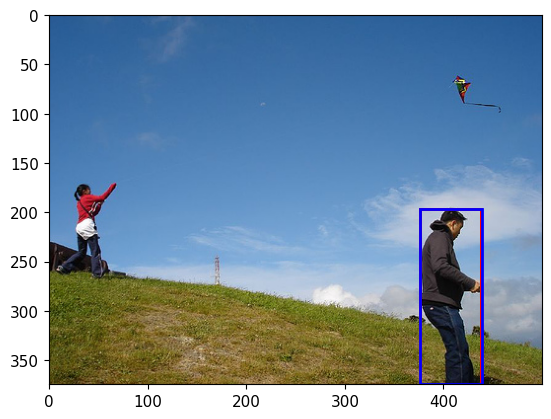

Jaccard: [0.11840440137126101] IoU: [tensor(0.96542)]


In [ ]:
input = dataset[10]

image_path = split_string(input["file_name"])
sentence = input["sentences"]["raw"]
original_img = Image.open(local_path+image_path).convert("RGB")
gt = input["bbox"]
x1, y1, width, height = gt
x2, y2 = x1 + width, y1 + height

model.reset_metrics()

# Verifica se le coordinate superano le dimensioni dell'immagine
if x1 < 0 or y1 < 0 or x2 > original_img.width or y2 > original_img.height:
    print("Bounding box fuori dai limiti dell'immagine!")
else:
    # Ritaglia l'immagine usando le coordinate della bounding box
    crop = original_img.crop((x1, y1, x2, y2))    
    # Mostra l'immagine originale con la bounding box
    %matplotlib inline
    plt.imshow(original_img)
    plt.gca().add_patch(plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='red', linewidth=2))

    bbox, img = model.evaluate(image_path, sentence, gt, original_img)

    plt.gca().add_patch(plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='red', linewidth=2))
    plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='blue', linewidth=2))
    print(bbox)
    print(sentence)
    plt.show()

print(model.metrics)

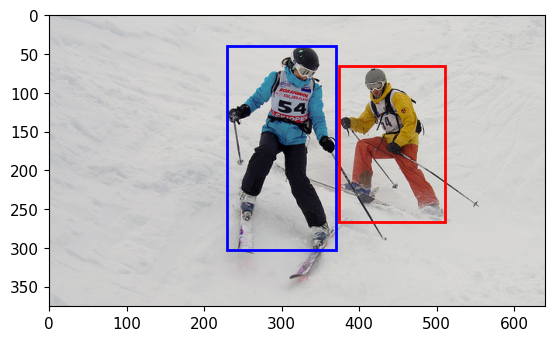

Iteration:  0
(0.0032757957925080993, 0.0)


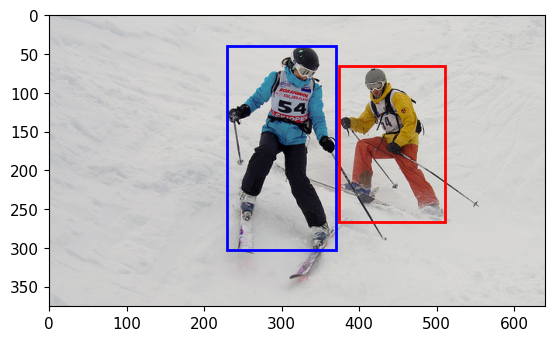

Iteration:  20
(0.020843441871665914, 0.591132663580589)
Iteration:  40
(0.01641078637266072, 0.4166976928710711)
Iteration:  60
(0.013406708733855674, 0.36811840049920946)
Iteration:  80
(0.012178559067040138, 0.3799080985149737)
Iteration:  100
(0.011839331966940132, 0.3708028083113806)


In [ ]:
#evaluation of the model
for i in range(0, 101):
    input = dataset[i]
    image_path = split_string(input["file_name"])
    sentence = input["sentences"]["raw"]
    gt = input["bbox"]
    original_img = Image.open(local_path+image_path).convert("RGB")
    #print img dimensions and box coordinates
    bbox, img = model.evaluate(image_path, sentence, gt, original_img)
    if model.get_metrics()[1]<0.10:
      %matplotlib inline
      plt.imshow(original_img)
      x1, y1, width, height = gt
      x2, y2 = x1 + width, y1 + height
      plt.gca().add_patch(plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='red', linewidth=2))
      plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='blue', linewidth=2))
      plt.show()

    if i % 20 == 0:
        print("Iteration: ", i)
        print(model.get_metrics())
        